<a href="https://colab.research.google.com/github/Nezu-life/Data_Science_For_Medicine_and_Biology/blob/main/Colab_Notebooks/Statistics_Survival_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.2/349.2 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.2/94.2 kB 4.4 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=e0f8d18227349c8fad6ba6e65410bdf8a284d2b093d9877020a574b3ed4de39e
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma
    lifetimes  event_observed       group
0           7               1     control
1           1               1     control
2           2               1     control
3           3               1     control
4           4               1     control
5           5               1     control
6           6               1     control
7           7               1     control
8           8               1     control
9           9               1     control
10         11               1

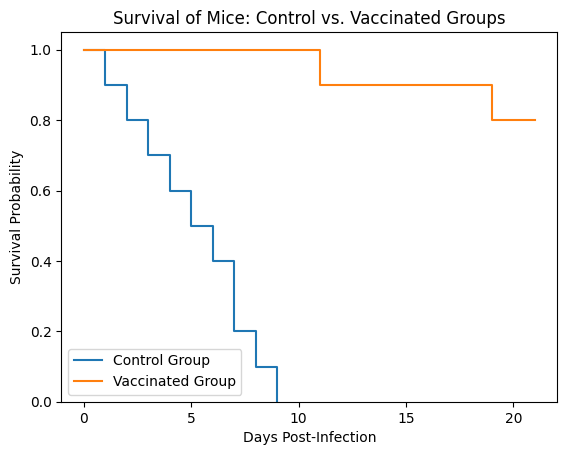

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          21.53 <0.005     18.13

In [ ]:
# Data Science for Medicine and Biology
#
# Nezu Life Sciences
#
# Feel free to modify, redistribute and above all,
# create something with this code.
#
# Tiago Lopes, PhD
# March 2024

!pip install lifelines

import pandas as pd
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test

# Reads the input file (CSV)
fileName = "https://raw.githubusercontent.com/Nezu-life/Data_Science_For_Medicine_and_Biology/main/datasets/survival_vaccinated_mice.csv"
data = pd.read_csv(fileName, sep="\t", header=0)

print(data)
# Kaplan-Meier Estimation
kmf = KaplanMeierFitter()

# Control Group
control_data = data[data['group'] == 'control']
kmf.fit(control_data['lifetimes'], control_data['event_observed'], label='Control Group')
ax = kmf.plot(ci_show=False)

# Vaccinated Group
vaccinated_data = data[data['group'] == 'vaccinated']
kmf.fit(vaccinated_data['lifetimes'], vaccinated_data['event_observed'], label='Vaccinated Group')
kmf.plot(ax=ax, ci_show=False)

# Adding title and labels
plt.title('Survival of Mice: Control vs. Vaccinated Groups')
plt.xlabel('Days Post-Infection')
plt.ylabel('Survival Probability')
plt.ylim(0, 1.05)

# Log-Rank Test
results = logrank_test(control_data['lifetimes'], vaccinated_data['lifetimes'],
                       event_observed_A=control_data['event_observed'],
                       event_observed_B=vaccinated_data['event_observed'])

# Plotting the results
plt.show()

# Display Log-Rank Test results
results.print_summary()

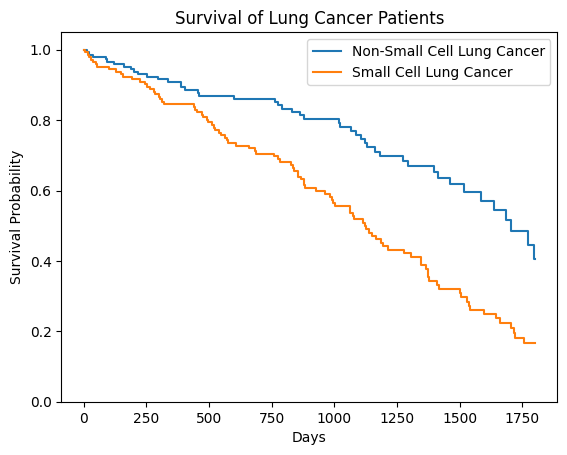

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          20.38 <0.005     17.27

In [ ]:
# Lung cancer example


# Reads the input file (CSV)
fileName = "https://raw.githubusercontent.com/Nezu-life/Data_Science_For_Medicine_and_Biology/main/datasets/survival_lung_cancer.csv"
data = pd.read_csv(fileName, sep=",", header=0)

# Kaplan-Meier Estimation
kmf = KaplanMeierFitter()

# Non-Small Cell Lung Cancer
nsclc_data = data[data['group'] == 'NSCLC']
kmf.fit(nsclc_data['lifetimes'], nsclc_data['event_observed'], label='Non-Small Cell Lung Cancer')
ax = kmf.plot(ci_show=False)

# Small Cell Lung Cancer
sclc_data = data[data['group'] == 'SCLC']
kmf.fit(sclc_data['lifetimes'], sclc_data['event_observed'], label='Small Cell Lung Cancer')
kmf.plot(ax=ax, ci_show=False)

# Adding title and labels
plt.title('Survival of Lung Cancer Patients')
plt.xlabel('Days')
plt.ylabel('Survival Probability')
plt.ylim(0, 1.05)

# Log-Rank Test
results = logrank_test(nsclc_data['lifetimes'], sclc_data['lifetimes'],
                       event_observed_A=nsclc_data['event_observed'],
                       event_observed_B=sclc_data['event_observed'])

# Plotting the results
plt.show()

# Display Log-Rank Test results
results.print_summary()
